In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Data Preparation**

In [3]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import os
import pathlib
from matplotlib import pyplot as plt
import seaborn as sns
import pickle
import pandas as pd
import numpy as np
import cv2
import skimage
from skimage.util import random_noise
import tensorflow as tf

from tqdm.notebook import tqdm
import random

In [ ]:
pip install gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Download files from Google drive using sharable link,
# https://stackoverflow.com/a/50670037/7697658
if 'NIND' not in os.listdir():
    !gdown https://drive.google.com/uc?id=1t5c3OUmHHDDvtpz4O-Gu_qrgggPxBAUW
    get_ipython().system_raw('7z x NIND.zip -o/content/ && rm NIND.zip')

Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1t5c3OUmHHDDvtpz4O-Gu_qrgggPxBAUW 



In [ ]:
# Download files from Google drive using sharable link,
# https://stackoverflow.com/a/50670037/7697658
if 'Mi3_Aligned' not in os.listdir():
  !gdown https://ani.stat.fsu.edu/~abarbu/Research/Mi3_Aligned.rar
  get_ipython().system_raw('7z x Mi3_Aligned.rar -o/content/ && rm Mi3_Aligned.rar')

Downloading...
From: https://ani.stat.fsu.edu/~abarbu/Research/Mi3_Aligned.rar
To: /content/Mi3_Aligned.rar
100% 2.14G/2.14G [00:30<00:00, 69.9MB/s]


In [ ]:
get_ipython().system_raw('7z x Mi3_Aligned.rar -o/content/ && rm Mi3_Aligned.rar')

In [ ]:
# Extract zip files to a destination directory,
# https://askubuntu.com/a/1049564
if 'SIDD_Small_sRGB_Only' not in os.listdir():
    !gdown https://competitions.codalab.org/my/datasets/download/a26784fe-cf33-48c2-b61f-94b299dbc0f2
    #get_ipython().system_raw('7z x SIDD_Small_sRGB_Only.zip -o/content/ && rm SIDD_Small_sRGB_Only.zip')

Downloading...
From: https://competitions.codalab.org/my/datasets/download/a26784fe-cf33-48c2-b61f-94b299dbc0f2
To: /content/a26784fe-cf33-48c2-b61f-94b299dbc0f2
100% 6.62G/6.62G [04:09<00:00, 26.5MB/s]


In [4]:
def get_images_paths( root_dir_mi):
    # Getting SSID dataset images
    # root = pathlib.Path(root_dir_ssid)
    # img_paths = list(root.rglob("*.PNG*"))
    # img_paths_lst = [str(path) for path in img_paths]

    gt_lst = []
    noisy_lst= []
    # for p in img_paths_lst:
    #     img_type = p.split("/")[-1].split('_')[-3]
    #     if img_type=="NOISY":
    #         noisy_lst.append(p)
    #     elif img_type=="GT":
    #         gt_lst.append(p)

    # Getting mi dataset images
    root = pathlib.Path(root_dir_mi)
    img_paths = list(root.rglob("*.bmp*"))
    img_paths_lst = [str(path) for path in img_paths]

    for p in img_paths_lst:
        img_type = p.split("/")[-1].split('_')[-1]
        if "Noisy" in img_type:
            noisy_lst.append(p)
        elif "Reference" in img_type:
            gt_lst.append(p)
            gt_lst.append(p)


    # Getting NIND dataset images
    # root = pathlib.Path(root_dir_nind)
    # img_paths = list(root.rglob("*.png*"))
    # img_paths.extend(list(root.rglob("*.jpg*")))
    # img_paths_lst = [str(path) for path in img_paths]

    # for p in img_paths_lst:
    #     img_type = p.split("/")[-1].split("_")[-1]
    #     if "H" in img_type:
    #         noisy_lst.append(p)
    #     else:
    #         gt_lst.append(p)
   
    noisy_array = np.asarray(noisy_lst)
    gt_array = np.asarray(gt_lst)
    return noisy_array, gt_array

In [ ]:
# # SANITY CHECK of the NIND image pairs
# for p, q in zip(noisy_lst, gt_lst):
#     n_file_name = p.split("/")[2]
#     n_file_name = n_file_name[n_file_name.find("_"):n_file_name.rfind("_")+1]

#     g_file_name = q.split("/")[2]
#     g_file_name = g_file_name[g_file_name.find("_"):g_file_name.rfind("_")+1]

#     if n_file_name!=g_file_name:
#         print("Something's wrong, I can feel it!",n_file_name,g_file_name)

In [ ]:
# # SANITY check of the mi phone image pairs
# noisy_array_paths, gt_array_paths = get_images_paths("SIDD_Small_sRGB_Only", "Mi3_Aligned")
# somethings_wrong=False
# mi_counter=0
# for gt_path, noisy_path in zip(gt_array_paths, noisy_array_paths):
#     batch_gt = gt_path.split("/")[1]
#     batch_noisy = noisy_path.split("/")[1]
#     if gt_path.split("/")[0]=="Mi3_Aligned":
#         mi_counter+=1
#         if batch_gt!=batch_noisy:
#             print(gt_path+" -- "+noisy_path)
#             somethings_wrong=True
#             break
# if somethings_wrong:
#     print("Something's wrong, I can feel it!", mi_counter)
# else:
#     print("Nothing to worry!", mi_counter)

In [5]:
from sklearn.model_selection import train_test_split

noisy_array_paths, gt_array_paths = get_images_paths( "/content/drive/MyDrive/Mi3_Aligned")

noisy_train_paths, noisy_test_paths, gt_train_paths, gt_test_paths = train_test_split(noisy_array_paths, gt_array_paths, test_size=0.20, random_state=42)

In [6]:

noisy_lst= []
root=pathlib.Path("/content/mypic")
img_paths = list(root.rglob("*.png*"))
img_paths_lst = [str(path) for path in img_paths]
for p in img_paths_lst:
  noisy_lst.append(p)
my_noisy_paths = np.asarray(noisy_lst)
print(my_noisy_paths.shape)

(4,)


In [7]:
print(noisy_train_paths.shape)
print(noisy_test_paths.shape)
print(gt_train_paths.shape)
print(gt_test_paths.shape)

(62,)
(16,)
(62,)
(16,)


In [ ]:
# noisy_array_paths, gt_array_paths = get_images_paths("SIDD_Small_sRGB_Only", "Mi3_Aligned", "NIND")

# train_indices = random.sample(range(len(noisy_array_paths)), int(len(noisy_array_paths)*0.8))
# test_indices = set(range(len(noisy_array_paths))) - set(train_indices)

# noisy_train_paths = noisy_array_paths[train_indices]
# noisy_test_paths  = noisy_array_paths[list(test_indices)]

# gt_train_paths = gt_array_paths[train_indices]
# gt_test_paths  = gt_array_paths[list(test_indices)]

# print(noisy_train_paths.shape)
# print(noisy_test_paths.shape)
# print(gt_train_paths.shape)
# print(gt_test_paths.shape)

In [9]:
# Get gt_images in memory
def get_images_in_mem(images_paths):
    images_lst = []
    for img_path in tqdm(images_paths):
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (256, 256))
        images_lst.append(img)
    return np.array(images_lst)

In [10]:
my_noisy_images=get_images_in_mem(my_noisy_paths)
print(my_noisy_images.shape)

  0%|          | 0/4 [00:00<?, ?it/s]

(4, 256, 256, 3)


In [ ]:
noisy_train_images = get_images_in_mem(noisy_train_paths)
noisy_test_images = get_images_in_mem(noisy_test_paths)

gt_train_images = get_images_in_mem(gt_train_paths)
gt_test_images = get_images_in_mem(gt_test_paths)

print(noisy_train_images.shape)
print(noisy_test_images.shape)

print(gt_train_images.shape)
print(gt_test_images.shape)

  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

(62, 256, 256, 3)
(16, 256, 256, 3)
(62, 256, 256, 3)
(16, 256, 256, 3)


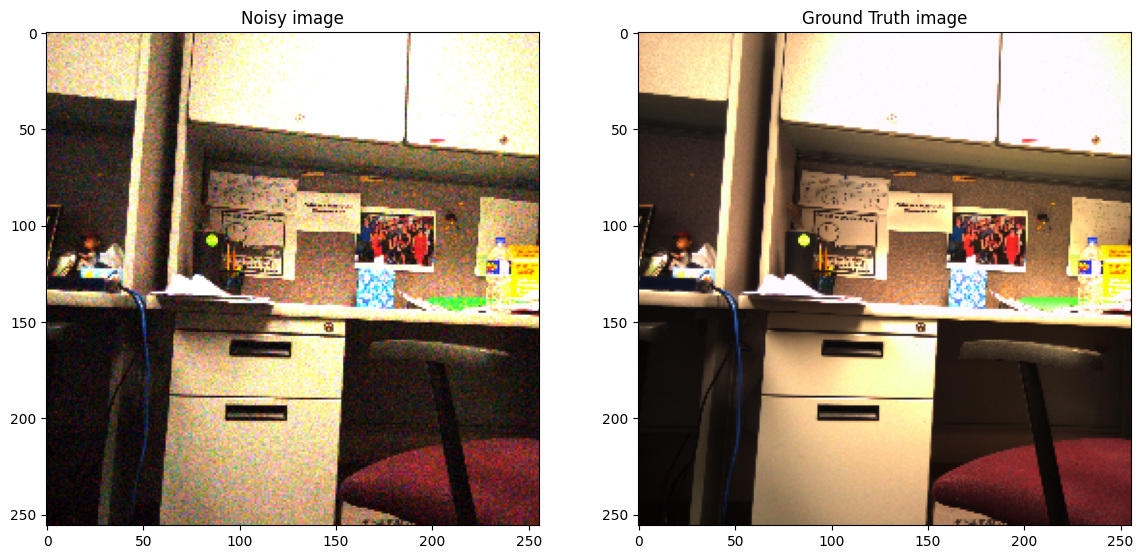

In [ ]:
f, axarr = plt.subplots(1,2, figsize=(14,14))
axarr[0].imshow(noisy_train_images[5])
axarr[0].set_title("Noisy image")
axarr[1].imshow(gt_train_images[5])
axarr[1].title.set_text("Ground Truth image")

In [ ]:
def _up_down_flip(image, label):
    image = tf.image.flip_up_down(image)
    label = tf.image.flip_up_down(label)
    return image, label

def _left_right_flip(image, label):
    image = tf.image.flip_left_right(image)
    label = tf.image.flip_left_right(label)
    return image, label

def _rotate(image, label):
    random_angle = tf.random.uniform(shape=[], minval=0, maxval=4, dtype=tf.int32)
    image = tf.image.rot90(image, random_angle)
    label = tf.image.rot90(label, random_angle)
    return image, label

def _hue(image, label):
    rand_value = random.uniform(-1,1)
    image = tf.image.adjust_hue(image, rand_value)
    label = tf.image.adjust_hue(label, rand_value)
    return image, label

def _brightness(image, label):
    rand_value = random.uniform(-0.08,0.25)
    image = tf.image.adjust_brightness(image, rand_value)
    label = tf.image.adjust_brightness(label, rand_value)
    return image, label

def _saturation(image, label):
    rand_value = random.uniform(1, 5)
    image = tf.image.adjust_saturation(image, rand_value)
    label = tf.image.adjust_saturation(label, rand_value)
    return image, label

def _contrast(image, label):
    rand_value = random.uniform(1, 3)
    image = tf.image.adjust_contrast(image, rand_value)
    label = tf.image.adjust_contrast(label, rand_value)
    return image, label

# What does batch, repeat, and shuffle do with TensorFlow Dataset?
# https://stackoverflow.com/q/53514495/7697658
def tf_data_generator(X, y, batch_size=32, augmentations=None):
    dataset = tf.data.Dataset.from_tensor_slices((X, y)) # This is the main step for data generation
    dataset = dataset.shuffle(1000, reshuffle_each_iteration=True)

    if augmentations:
        for f in augmentations:
            if np.random.uniform(0,1)<0.5:
                dataset = dataset.map(f, num_parallel_calls=2)

    dataset = dataset.repeat()
    dataset = dataset.batch(batch_size=batch_size, drop_remainder=True)
    dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)
    return dataset

BATCH_SIZE=4
augmentation_lst = [_up_down_flip, _left_right_flip, _rotate]
image_generator_train = tf_data_generator(X=noisy_train_images, y=gt_train_images, batch_size=BATCH_SIZE, augmentations=augmentation_lst)
image_generator_test = tf_data_generator(X=noisy_test_images, y=gt_test_images, batch_size=BATCH_SIZE)

In [ ]:
image_generator_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(4, 256, 256, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(4, 256, 256, 3), dtype=tf.uint8, name=None))>

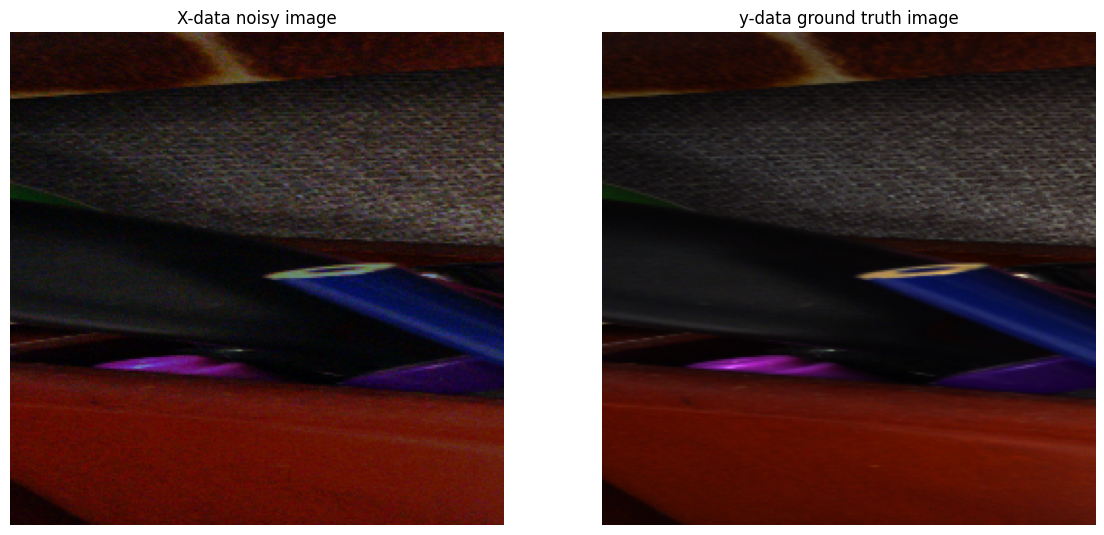

In [ ]:
# SANITY CHECK of the Dataset generator
for noisy, gt in image_generator_train.take(1):  # only take first element of dataset
    numpy_images = noisy.numpy()
    numpy_labels = gt.numpy()

f, axarr = plt.subplots(1,2, figsize=(14,14))
axarr[0].imshow(numpy_images[1])
axarr[0].set_title("X-data noisy image")
axarr[0].set_axis_off()

axarr[1].imshow(numpy_labels[1])
axarr[1].set_title("y-data ground truth image")
axarr[1].set_axis_off()

# **MWCNN**

In [11]:
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, Conv2DTranspose,\
                                    GlobalAveragePooling2D, AveragePooling2D, MaxPool2D, UpSampling2D,\
                                    BatchNormalization, Activation, ReLU, Flatten, Dense, Input,\
                                    Add, Multiply, Concatenate, Softmax
from tensorflow.keras import initializers, regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.activations import softmax

tf.keras.backend.set_image_data_format('channels_last')
import keras.backend as K

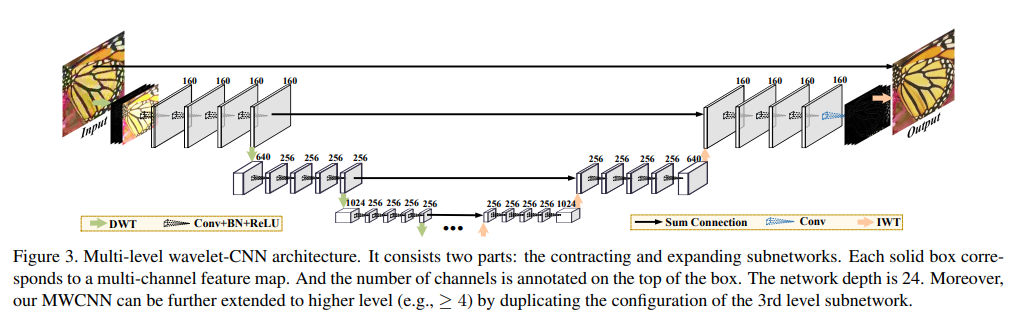

In [12]:
class Conv_block(tf.keras.layers.Layer):
    def  __init__(self, num_filters=200, kernel_size=3, **kwargs):
        super().__init__(**kwargs)
        self.num_filters=num_filters
        self.kernel_size=kernel_size
        self.conv_1 = Conv2D(filters=self.num_filters, kernel_size=self.kernel_size, padding='same')
        self.conv_2 = Conv2D(filters=self.num_filters, kernel_size=self.kernel_size, padding='same')
        self.conv_3 = Conv2D(filters=self.num_filters, kernel_size=self.kernel_size, padding='same')
        self.conv_4 = Conv2D(filters=self.num_filters, kernel_size=self.kernel_size, padding='same')

        self.bn_1 = BatchNormalization()
        self.bn_2 = BatchNormalization()
        self.bn_3 = BatchNormalization()
        self.bn_4 = BatchNormalization()
    
    def get_config(self):
        config = super().get_config().copy()
        config.update({
            'num_filters': self.num_filters,
            'kernel_size':self.kernel_size
        })
        return config

    def call(self, X):
        X = self.conv_1(X)
        # X = self.bn_1(X)
        X = ReLU()(X)
        X = self.conv_2(X)
        # X = self.bn_2(X)
        X = ReLU()(X)
        X = self.conv_3(X)
        # X = self.bn_3(X)
        X = ReLU()(X)
        # X = self.conv_4(X)
        # # X = self.bn_4(X)
        # X = ReLU()(X)

        return X

In [13]:
class DWT_downsampling(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        
    def call(self, x):
        """
        The following calculations for DWT are inspired from,
        https://github.com/AureliePeng/Keras-WaveletTransform/blob/master/models/DWT.py
        """
        x1 = x[:, 0::2, 0::2, :] #x(2i−1, 2j−1)
        x2 = x[:, 1::2, 0::2, :] #x(2i, 2j-1)
        x3 = x[:, 0::2, 1::2, :] #x(2i−1, 2j)
        x4 = x[:, 1::2, 1::2, :] #x(2i, 2j)   

        x_LL = x1 + x2 + x3 + x4
        x_LH = -x1 - x3 + x2 + x4
        x_HL = -x1 + x3 - x2 + x4
        x_HH = x1 - x3 - x2 + x4

        return Concatenate(axis=-1)([x_LL, x_LH, x_HL, x_HH])

In [14]:
class IWT_upsampling(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        
    def call(self, x):
        """
        The following calculations for IWT are inspired from,
        https://github.com/AureliePeng/Keras-WaveletTransform/blob/master/models/DWT.py
        """
        x_LL = x[:, :, :, 0:x.shape[3]//4]
        x_LH = x[:, :, :, x.shape[3]//4:x.shape[3]//4*2]
        x_HL = x[:, :, :, x.shape[3]//4*2:x.shape[3]//4*3]
        x_HH = x[:, :, :, x.shape[3]//4*3:]

        x1 = (x_LL - x_LH - x_HL + x_HH)/4
        x2 = (x_LL - x_LH + x_HL - x_HH)/4
        x3 = (x_LL + x_LH - x_HL - x_HH)/4
        x4 = (x_LL + x_LH + x_HL + x_HH)/4 

        y1 = K.stack([x1,x3], axis=2)
        y2 = K.stack([x2,x4], axis=2)
        shape = K.shape(x)
        return K.reshape(K.concatenate([y1,y2], axis=-1), K.stack([shape[0], shape[1]*2, shape[2]*2, shape[3]//4]))

In [15]:
# def create_model():
#     tf.keras.backend.clear_session()

#     input = Input(shape=(256,256,3))

#     cb_1 = Conv_block(num_filters=64)(input)
#     # print("cb 1=",cb_1.shape)
#     dwt_1 = DWT_downsampling()(cb_1)
#     # print("dwt 1=",dwt_1.shape)

#     cb_2 = Conv_block(num_filters=128)(dwt_1)
#     # print("cb 2=",cb_2.shape)
#     dwt_2 = DWT_downsampling()(cb_2)
#     # print("dwt 2=",dwt_2.shape)

#     cb_3 = Conv_block(num_filters=256)(dwt_2)
#     cb_4 = Conv_block(num_filters=256)(cb_3)
#     cb_4 = Conv2D(filters=512, kernel_size=3, strides=1, padding='same')(cb_4)

#     iwt_1 = IWT_upsampling()(cb_4)
#     cb_5 = Conv_block(num_filters=128)(Add()([iwt_1, cb_2]))
#     cb_5 = Conv2D(filters=256, kernel_size=3, strides=1, padding='same')(cb_5)

#     iwt_2 = IWT_upsampling()(cb_5)
#     cb_6 = Conv_block(num_filters=64)(Add()([iwt_2, cb_1]))
#     cb_6 = Conv2D(filters=3, kernel_size=(1, 1), padding="same")(cb_6)

#     out = cb_6

#     return Model(inputs=[input], outputs=[out])

In [16]:
def create_model():
    tf.keras.backend.clear_session()

    input = Input(shape=(256,256,3))

    cb_1 = Conv_block(num_filters=64)(input)
    dwt_1 = DWT_downsampling()(cb_1)

    cb_2 = Conv_block(num_filters=128)(dwt_1)
    dwt_2 = DWT_downsampling()(cb_2)

    cb_3 = Conv_block(num_filters=256)(dwt_2)
    dwt_3 = DWT_downsampling()(cb_3)

    cb_4 = Conv_block(num_filters=512)(dwt_3)
    dwt_4 = DWT_downsampling()(cb_4)

    cb_5 = Conv_block(num_filters=512)(dwt_4)
    cb_5 = BatchNormalization()(cb_5)
    cb_5 = Conv_block(num_filters=512)(cb_5)
    cb_5 = Conv2D(filters=2048, kernel_size=3, strides=1, padding='same')(cb_5)

    up = IWT_upsampling()(cb_5)
    up = Conv_block(num_filters=512)(Add()([up, cb_4]))
    up = Conv2D(filters=1024, kernel_size=3, strides=1, padding='same')(up)

    up = IWT_upsampling()(up)
    up = Conv_block(num_filters=256)(Add()([up, cb_3]))
    up = Conv2D(filters=512, kernel_size=3, strides=1, padding='same')(up)
    
    up = IWT_upsampling()(up)
    up = Conv_block(num_filters=128)(Add()([up, cb_2]))
    up = Conv2D(filters=256, kernel_size=3, strides=1, padding='same')(up)
    
    up = IWT_upsampling()(up)
    up = Conv_block(num_filters=64)(Add()([up, cb_1]))
    up = Conv2D(filters=128, kernel_size=3, strides=1, padding='same')(up)

    out = Conv2D(filters=3, kernel_size=(1, 1), padding="same")(up)

    return Model(inputs=[input], outputs=[out])

model = create_model()
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv_block (Conv_block)        (None, 256, 256, 64  75648       ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 dwt_downsampling (DWT_downsamp  (None, 128, 128, 25  0          ['conv_block[0][0]']             
 ling)                          6)                                                            

# **Training**

In [ ]:
steps_per_epoch_train = len(noisy_train_images)
steps_per_epoch_validation = len(noisy_test_images)

In [ ]:
callbacks_lst = [
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', min_lr=0.0000009, min_delta=0.0001, factor=0.70, patience=3, verbose=1, mode='min'),
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, min_delta=0.0001, patience=10)
]

In [ ]:
model.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer=Adam(learning_rate=0.0009))
model.fit(image_generator_train, 
          validation_data=image_generator_test,
                        steps_per_epoch=steps_per_epoch_train,
                        validation_steps=steps_per_epoch_validation,
                        epochs=100,
                        verbose=1,
                        callbacks=callbacks_lst)

Epoch 1/100
62/62 [==============================] - 31s 84ms/step - loss: 28694.0273 - val_loss: 709.4477 - lr: 9.0000e-04
Epoch 2/100
62/62 [==============================] - 4s 60ms/step - loss: 817.9271 - val_loss: 474.2364 - lr: 9.0000e-04
Epoch 3/100
62/62 [==============================] - 4s 59ms/step - loss: 479.8847 - val_loss: 244.7548 - lr: 9.0000e-04
Epoch 4/100
62/62 [==============================] - 4s 59ms/step - loss: 318.8609 - val_loss: 206.6424 - lr: 9.0000e-04
Epoch 5/100
62/62 [==============================] - 4s 59ms/step - loss: 274.2782 - val_loss: 185.2285 - lr: 9.0000e-04
Epoch 6/100
62/62 [==============================] - 4s 59ms/step - loss: 255.3392 - val_loss: 338.3405 - lr: 9.0000e-04
Epoch 7/100
62/62 [==============================] - 4s 60ms/step - loss: 346.1062 - val_loss: 189.7640 - lr: 9.0000e-04
Epoch 8/100
62/62 [==============================] - 4s 60ms/step - loss: 219.4085 - val_loss: 140.5520 - lr: 9.0000e-04
Epoch 9/100
62/62 [==========

In [ ]:
best_models_path = "/content/drive/MyDrive/Colab Notebooks/Applied AI Assignments/Case Study 2 Image Denoising/Best Models/MWCNN model/"
model.save(best_models_path+"best_MWCNN_blindnoise_256x256.h5")

In [ ]:
best_models_path = "/content/drive/MyDrive/Colab Notebooks/Applied AI Assignments/Case Study 2 Image Denoising/Best Models/MWCNN model/"
model = tf.keras.models.load_model(best_models_path+'best_MWCNN_blindnoise_256x256.h5', custom_objects={'DWT_downsampling':DWT_downsampling,
                                                                                                        'IWT_upsampling':IWT_upsampling,
                                                                                                        'Conv_block':Conv_block})

# **Inference**

gt_images are in range of 0-255 (int);<br>
noisy_images are in range of 0-255 (int);<br>
predicted_images are in range 0-255 (float);

In [17]:
model = tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/Applied AI Assignments/Case Study 2 Image Denoising/Best Models/MWCNN model/best_MWCNN_blindnoise_256x256.h5", custom_objects={'DWT_downsampling':DWT_downsampling,
                                                                                                        'IWT_upsampling':IWT_upsampling,
                                                                                                        'Conv_block':Conv_block})

In [18]:
# Inference
def inference_single_image(model, noisy_image):
    input_image = np.expand_dims(noisy_image, axis=0)
    predicted_image = model.predict(input_image)
    
    return predicted_image[0]

def inference_batch_images(model, noisy_images):
    predicted_image = model.predict(noisy_images)
    return predicted_image

In [19]:
def visualize_predictions(model, X_test, y_test, n):
    random_numbers = random.choices(range(X_test.shape[0]), k=n)    # Get n random indices
    for i in random_numbers:
        noisy_image = X_test[i]
        gt_image = y_test[i]
        predicted_image = inference_single_image(model, X_test[i])
        predicted_image/=255

        f, axarr = plt.subplots(1,3, figsize=(21,21))
        axarr[0].imshow(noisy_image)
        axarr[0].set_title("Noisy image")
        axarr[0].set_axis_off()
        axarr[1].imshow(gt_image)
        axarr[1].set_title("Ground truth image")
        axarr[1].set_axis_off()
        axarr[2].imshow(predicted_image)
        axarr[2].set_title("Predicted image")
        axarr[2].set_axis_off()
        
        plt.imshow(predicted_image)

In [20]:
def pre(model, X_test,y_test,n):
    random_numbers = random.choices(range(X_test.shape[0]), k=n)    # Get n random indices
    for i in random_numbers:
        noisy_image = X_test[i]
        gt_image = y_test[i]
        predicted_image = inference_single_image(model, X_test[i])
        predicted_image/=255

        f, axarr = plt.subplots(1,3, figsize=(21,21))
        axarr[0].imshow(noisy_image)
        axarr[0].set_title("Noisy image")
        axarr[0].set_axis_off()
        axarr[1].imshow(gt_image)
        axarr[1].set_title("Ground truth image")
        axarr[1].set_axis_off()
        axarr[2].imshow(predicted_image)
        axarr[2].set_title("Predicted image")
        axarr[2].set_axis_off()
        
        # plt.imsave('Predicted1.jpg',predicted_image)

In [24]:
def my_pre(model, X_test,n):
     # Get n random indices
    random_numbers = random.choices(range(X_test.shape[0]), k=n,weights=[0,1,0,0])
    for i in random_numbers:
        noisy_image = X_test[i]
        predicted_image = inference_single_image(model, X_test[i])
        predicted_image/=255
        #print(predicted_image.shape)
        # f, axarr = plt.subplots(1,2, figsize=(21,21))
        # axarr[0].imshow(noisy_image)
        # axarr[0].set_title("Noisy image")
        # axarr[0].set_axis_off()
        # axarr[1].imshow(predicted_image)
        # axarr[1].set_title("Predicted image")
        # axarr[1].set_axis_off()
        
        afterimg = np.array((predicted_image - np.min(predicted_image)) / (np.max(predicted_image) - np.min(predicted_image)))
        plt.imsave('Predicted2.png',afterimg)

1/1 [==============================] - 0s 23ms/step


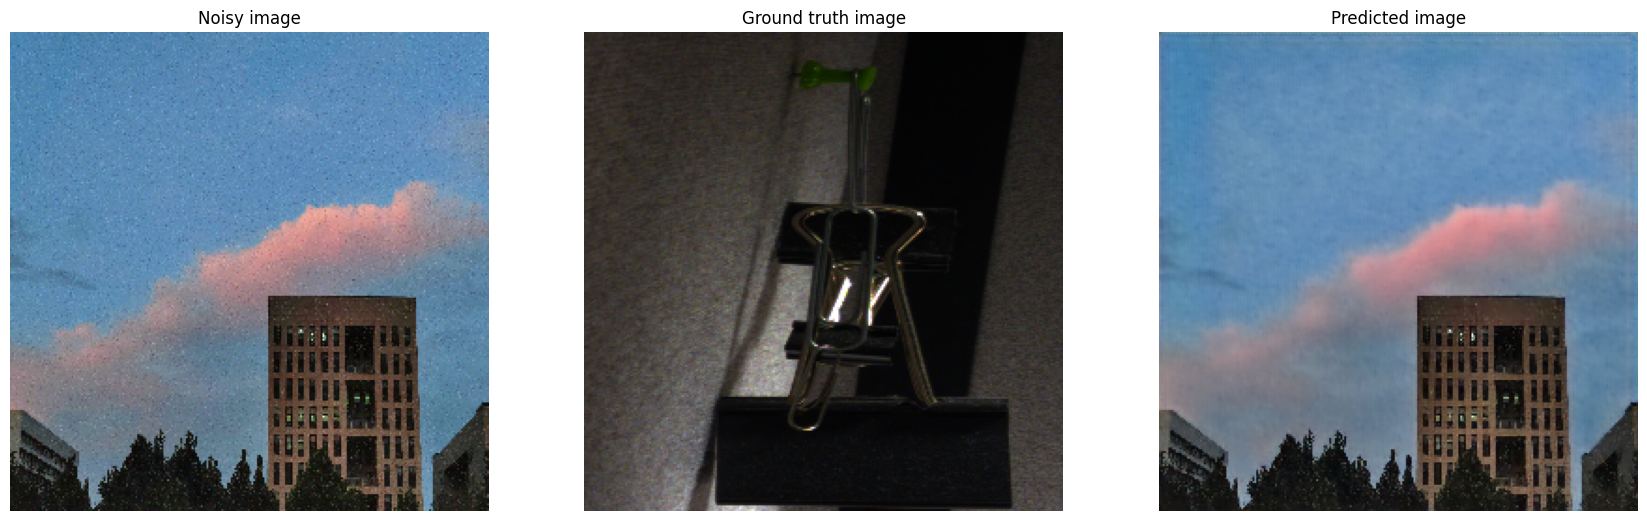

In [ ]:
pre(model, noisy_test_images, gt_test_images, 1)

In [25]:
my_pre(model, my_noisy_images, 1)

1/1 [==============================] - 0s 24ms/step


In [ ]:
visualize_predictions(model, noisy_test_images, gt_test_images, 10)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


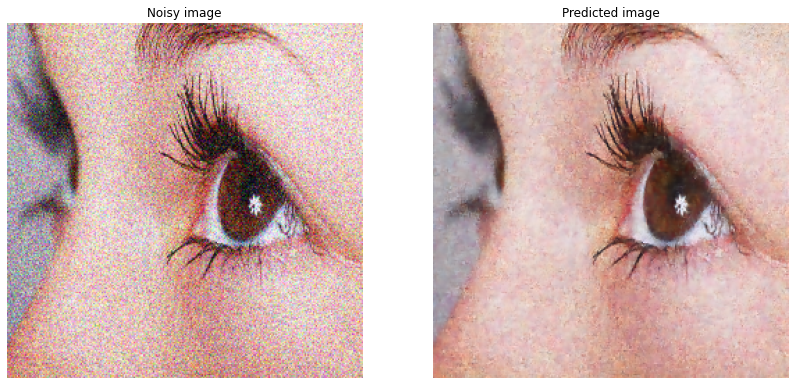

In [ ]:
# Test image prediction
banana = "NIND_banana_ISOH3.png"
kibbles = "NIND_kibbles_ISOH3.png"
library = "NIND_BruegelLibraryS1_NZ.png"
parrots = "kodim23-noise-std51.png"
eye = "eye_closeup_smaller_DIM25_noise_stddev_51.png"

img_path = "/content/drive/MyDrive/Colab Notebooks/Applied AI Assignments/Case Study 2 Image Denoising/MWCNN/"+eye

img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (256, 256))

predicted_image = inference_single_image(model, img)
predicted_image/=255

f, axarr = plt.subplots(1,2, figsize=(14,14))
axarr[0].imshow(img)
axarr[0].title.set_text("Noisy image")
axarr[0].set_axis_off()

axarr[1].imshow(predicted_image)
axarr[1].title.set_text("Predicted image")
axarr[1].set_axis_off()

In [ ]:
from skimage.metrics import peak_signal_noise_ratio

predicted_images = inference_batch_images(model, noisy_test_images)
psnr_original_mean = 0
psnr_prediction_mean = 0

for gt_img, noisy_img, predicted_img in zip(gt_test_images, noisy_test_images, predicted_images):
    psnr_original_mean += peak_signal_noise_ratio(gt_img, noisy_img)
    psnr_prediction_mean += peak_signal_noise_ratio(gt_img, predicted_img)

psnr_original_mean/=gt_test_images.shape[0]
psnr_prediction_mean/=gt_test_images.shape[0]
print("Original average gt-noisy PSNR ->", psnr_original_mean)
print("Predicted average gt-predicted PSNR ->", psnr_prediction_mean)

Original average gt-noisy PSNR -> 26.377910119463
Predicted average gt-predicted PSNR -> 32.52207023589397


In [ ]:
from skimage.metrics import structural_similarity as ssim

predicted_images = inference_batch_images(model, noisy_test_images)
ssim_original_mean = 0
ssim_prediction_mean = 0

for gt_img, noisy_img, predicted_img in zip(gt_test_images, noisy_test_images, predicted_images):
    ssim_original_mean += ssim(gt_img, noisy_img, multichannel=True, data_range=noisy_img.max() - noisy_img.min())
    ssim_prediction_mean += ssim(gt_img, predicted_img, multichannel=True, data_range=predicted_img.max() - predicted_img.min())

ssim_original_mean/=gt_test_images.shape[0]
ssim_prediction_mean/=gt_test_images.shape[0]
print("Original average gt-noisy SSIM ->", ssim_original_mean)
print("Predicted average gt-predicted SSIM ->", ssim_prediction_mean)

Original average gt-noisy SSIM -> 0.6000797315476446
Predicted average gt-predicted SSIM -> 0.8396871006897704


In [ ]:
from prettytable import PrettyTable

pt = PrettyTable()
print("Note: Improvements shown are over original pairs")
pt.field_names = ["Model", "PSNR", "SSIM", "PSNR Improvement", "SSIM improvement"]

pt.add_row(["Original X-y pairs (No Model)","26.3779","0.6000", "-", "-"])
pt.add_row(["REDNet (Baseline)","30.5713","0.7932", "4.1934","0.1932"])
pt.add_row(["MWCNN (using Wavelets)","32.5220","0.8397","6.1441","0.2397"])
pt.add_row(["PRIDNet (using Attention)","33.3105","0.8534","6.9326","0.2534"])

print(pt)

Note: Improvements shown are over original pairs
+-------------------------------+---------+--------+------------------+------------------+
|             Model             |   PSNR  |  SSIM  | PSNR Improvement | SSIM improvement |
+-------------------------------+---------+--------+------------------+------------------+
| Original X-y pairs (No Model) | 26.3779 | 0.6000 |        -         |        -         |
|       REDNet (Baseline)       | 30.5713 | 0.7932 |      4.1934      |      0.1932      |
|     MWCNN (using Wavelets)    | 32.5220 | 0.8397 |      6.1441      |      0.2397      |
|   PRIDNet (using Attention)   | 33.3105 | 0.8534 |      6.9326      |      0.2534      |
+-------------------------------+---------+--------+------------------+------------------+
